## **Comcast Telecom Consumer Complaints**

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints. The existing database will serve as a repository of public customer complaints filed against Comcast. It will help to pin down what is wrong with Comcast's customer service.
PRACTICE LABS

Data Dictionary
ASSESSMENT
- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status Status of complaint
- Filing on behalf of someone


Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Here you have to show 2 bar charts 1) State V/S no of requests per complain status. 2) States V/S no of complaints per type. Use the categorized variable from Q3. Provide insights on:
- Which state has the maximum complaints
- Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
The analysis results to be provided with insights wherever applicable.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Import the Data Set
com_df = pd.read_csv('D:/Projects/P3 - Comcast/Comcast telecom complaints data.csv')

In [157]:
com_df = com_df.rename(columns={'Ticket #':'Ticket'})

In [158]:
com_df

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [159]:
com_df.isnull().sum()

Ticket                         0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [160]:
# Converting the Date and Date_month_year from object to Date time datatype
com_df['Date'] = pd.to_datetime(com_df['Date'], format='%d-%m-%y')
com_df['Date_month_year'] = pd.to_datetime(com_df['Date_month_year'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\2013070402.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  com_df['Date_month_year'] = pd.to_datetime(com_df['Date_month_year'])


In [161]:
com_df.dtypes

Ticket                                 object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [162]:
# Creating a new Column from 'Date_month_year' column
#com_df['Month'] = com_df['Date_month_year'].dt.month

In [163]:
com_df.head()

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [164]:
# Removing Duplicates if any
com_df.drop_duplicates(subset ="Ticket", keep = False, inplace = True)

In [165]:
# Creating a separate column for Day, Month and Year
com_df['Day'] = pd.DatetimeIndex(com_df['Date_month_year']).day
com_df['Month'] = pd.DatetimeIndex(com_df['Date_month_year']).month
com_df['Year'] = pd.DatetimeIndex(com_df['Date_month_year']).year


In [166]:
com_df.head()

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015


In [167]:
complaint_counts = com_df.groupby('Month').size()
complaint_counts

Month
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
dtype: int64

**I want to know which day received how many complaints in each month**

In [168]:
# Filter the DataFrame to only include rows where the Month column is equal to January.
df_filter1 = com_df[com_df['Month'] == 1]

# Group the filtered DataFrame by the Day column and count the number of rows in each group:
complaint_counts1 = df_filter1.groupby('Day').size()
complaint_counts1

Day
4    18
5    12
6    25
dtype: int64

In [169]:
# Filter the DataFrame to only include rows where the Month column is February.
df_filter2 = com_df[com_df['Month'] == 2]
complaint_counts2 = df_filter2.groupby('Day').size()
complaint_counts2

Day
4    27
5     7
6    25
dtype: int64

In [170]:
df_filter3 = com_df[com_df['Month'] == 3]
complaint_counts3 = df_filter3.groupby('Day').size()
complaint_counts3

Day
4    15
5     5
6    25
dtype: int64

In [171]:
Complaint_types = com_df['Customer Complaint'].unique()
Complaint_types

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [172]:
# Complaints based on month
April = com_df[com_df['Month'].isin([4, 'April'])]['Customer Complaint']
April

0                           Comcast Cable Internet Speeds
2                                       Speed and Service
10      Billing after service was asked to be disconne...
17      Comcast owes me $65 and claims I need to retur...
27      Apartment Management's Exclusivity Contract wi...
                              ...                        
2191                                       Comcast Outage
2200                  Comcast Xfintity Internet Data Caps
2201                Miss Represented and over charged now
2213               i had sent out a check payment comcast
2217                       problems with internet service
Name: Customer Complaint, Length: 375, dtype: object

**Provide the trend chart for the number of complaints at Daily granularity levels.**

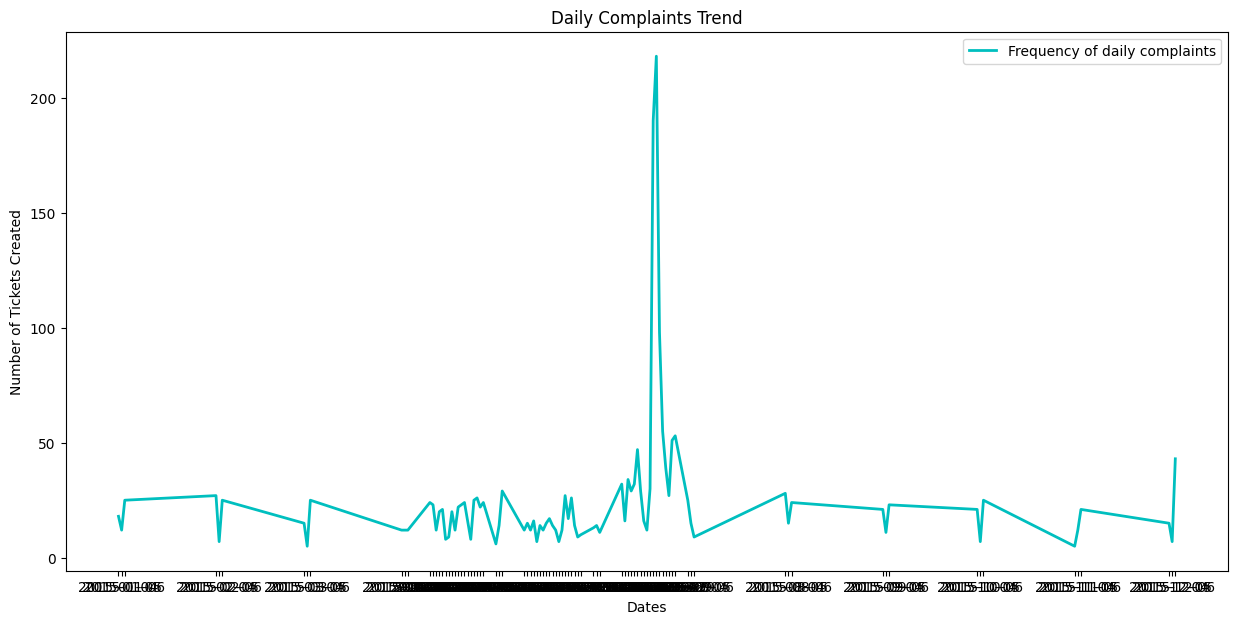

In [173]:
plt.figure(figsize=(15,7))
plt.plot(sorted(com_df["Date"].unique()), com_df.groupby(["Date"]).size(), color = 'c', linewidth = 2, linestyle = '-', label = 'Frequency of daily complaints')
plt.xticks(sorted(com_df["Date_month_year"].unique()))
plt.xlabel('Dates')
plt.ylabel('Number of Tickets Created')
plt.title('Daily Complaints Trend')
plt.legend()
plt.show()

**Provide the trend chart for the number of complaints at Monthly granularity levels.**

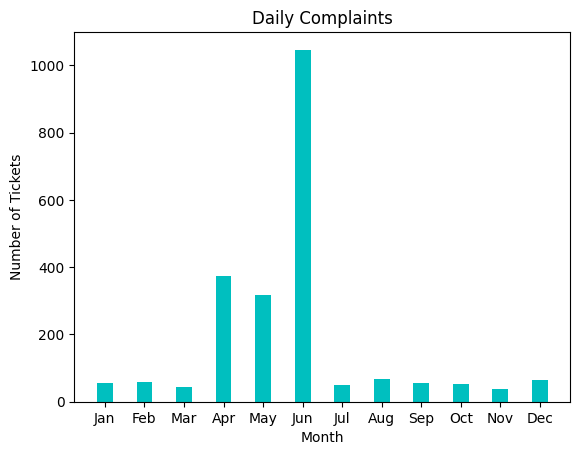

In [174]:
# plt.figure(figsize=(11, 8))
plt.bar(sorted(com_df["Month"].unique()), com_df.groupby(["Month"]).size(), color = 'c', width = 0.4)
plt.xticks(sorted(com_df["Month"].unique()),['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.title('Daily Complaints')
plt.show()

Below I have shown how the Monthly complaints can be represented in line graph.

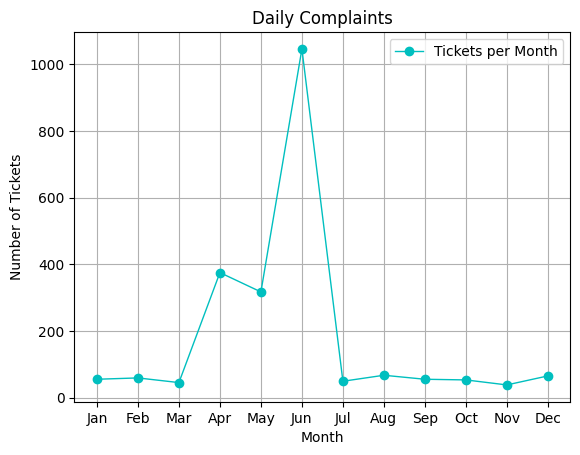

In [175]:
# plt.figure(figsize=(16, 9))
plt.plot(sorted(com_df["Month"].unique()), com_df.groupby(["Month"]).size(), color='c',linestyle='-', linewidth = 1, label ='Tickets per Month', marker = 'o')
plt.xticks(sorted(com_df["Month"].unique()),['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.title('Daily Complaints')
plt.legend()
plt.grid(True)
plt.show()

**Provide a table with frequency of complaint types.**

In [176]:
com_df['Customer Complaint'].drop_duplicates

<bound method Series.drop_duplicates of 0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object>

In [177]:
com_df['Customer Complaint'] = com_df['Customer Complaint'].str.lower()

In [178]:
com_df['Customer Complaint'].value_counts().head(n=19)

Customer Complaint
comcast                      102
comcast data cap              30
comcast internet              29
comcast data caps             21
comcast billing               18
comcast service               15
internet speed                15
unfair billing practices      13
data caps                     13
data cap                      12
comcast complaint             11
comcast/xfinity               11
comcast internet service      10
billing                        9
billing issues                 8
comcast cable                  5
internet                       5
comcast billing complaint      5
comcast issues                 5
Name: count, dtype: int64

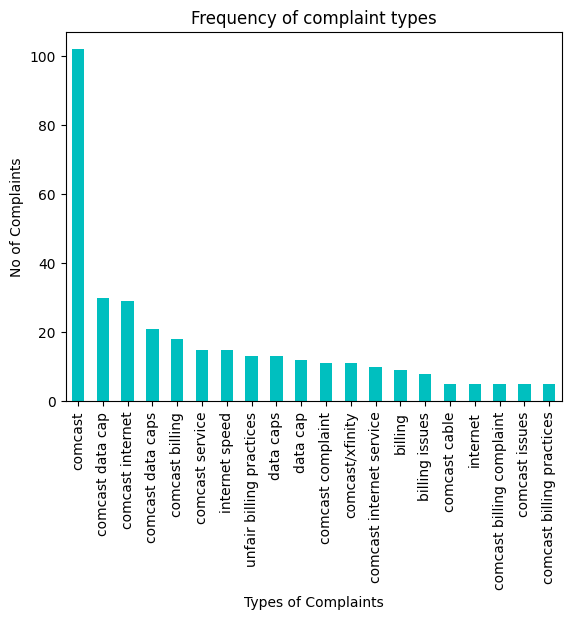

In [179]:
# colors = ['Red','Orange','Yellow','Green','Blue','Purple','Pink','Brown','Black']
com_df["Customer Complaint"].value_counts()[:20].plot.bar(color='c')
plt.xlabel('Types of Complaints')
plt.ylabel('No of Complaints')
plt.title('Frequency of complaint types')
plt.show()

**Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.**

In [180]:
com_df['Status'].value_counts()

Status
Solved     973
Closed     734
Open       363
Pending    154
Name: count, dtype: int64

In [181]:
#Creating a function which returns open for open & pending cases and returns closed for closed and solved cases.
def New_Status(col):
    if col == 'Open':
        val = 'Open'
    elif col == 'Pending':
        val = 'Open'
    elif col == "Solved":
        val = 'Closed'
    else:
        val = 'Closed'
    return val    

In [182]:
com_df['New Status'] = com_df['Status'].apply(New_Status)

In [183]:
com_df.head()

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year,New Status
0,250635,comcast cable internet speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,Closed
1,223441,payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,Closed
2,242732,speed and service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,Open
4,307175,comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,Closed


In [184]:
# There is another method of writing if-else statement for the Status column

# com_df['New Status'] = ['Closed' if Status == 'Closed' or Status == 'Solved' else 'Open' for Status in com_df['Status']]

In [185]:
com_df['New Status'].value_counts()

New Status
Closed    1707
Open       517
Name: count, dtype: int64

In [187]:
State = pd.DataFrame(com_df.groupby('State')['New Status'].count().sort_values(ascending=False))

In [188]:
State.head(n=10)

,New Status
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


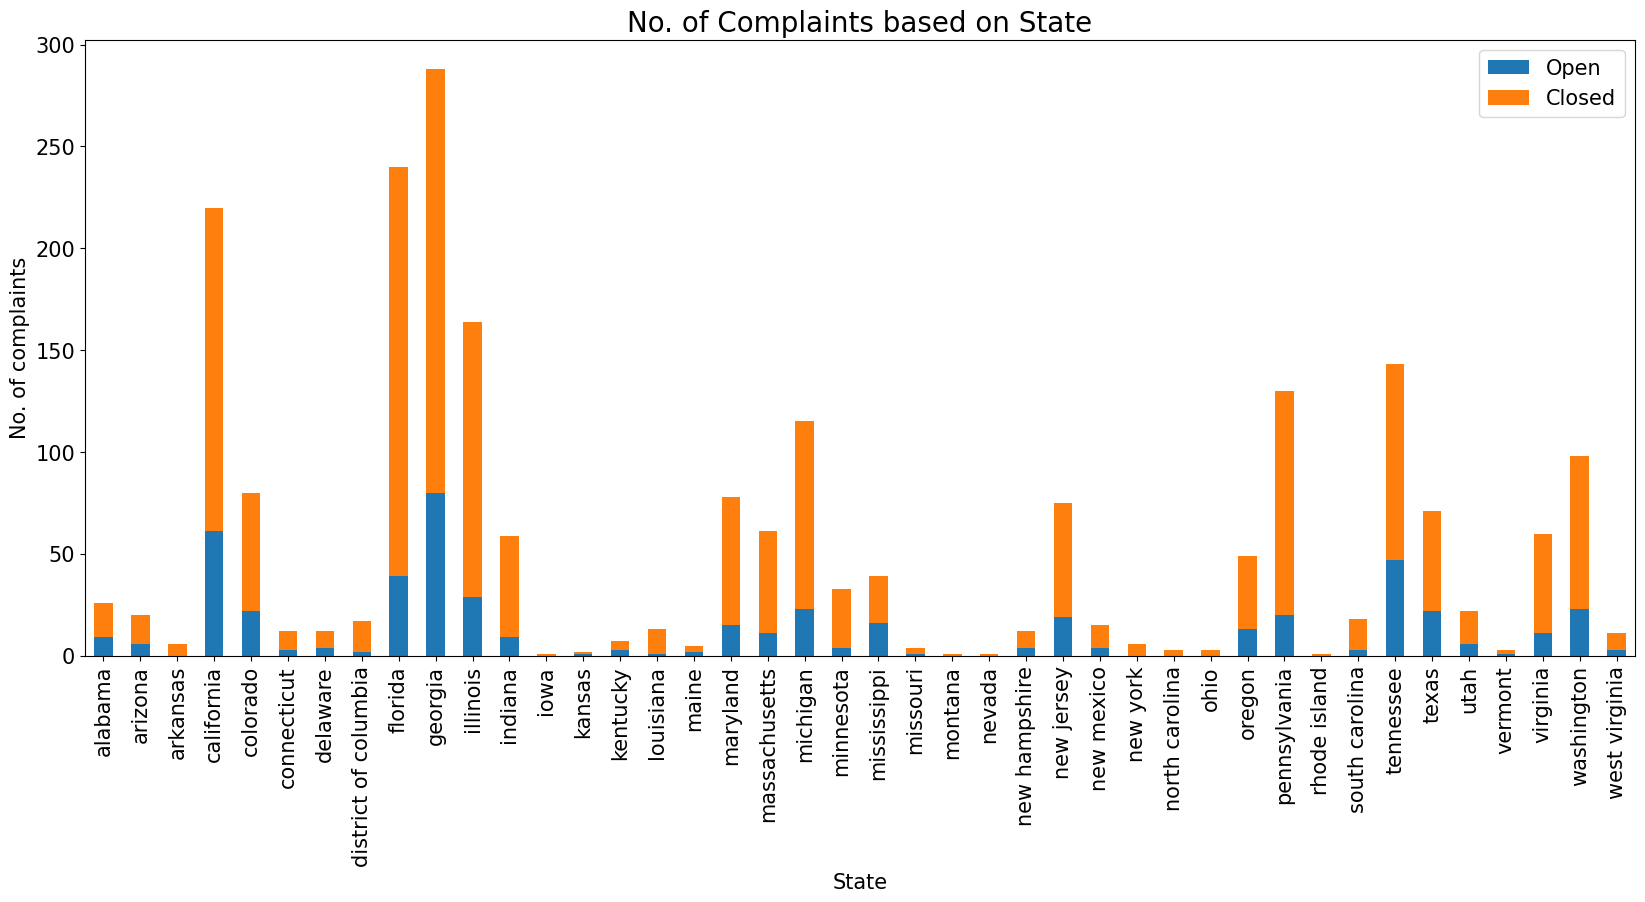

In [189]:
#Creating Stacked bar chart using New Status Created
com_df["State"]= com_df["State"].str.lower() #District of colombia is in different formats
state_chart = com_df.groupby(['State', 'New Status'])['State'].count().unstack('New Status').fillna(0)
ab = state_chart[['Open','Closed']].plot(kind='bar', stacked=True,rot=90,figsize=(20,8),fontsize=15)
ab.set_xlabel("State",fontsize=15)
ab.set_ylabel("No. of complaints",fontsize=15)
ab.set_title("No. of Complaints based on State",fontsize=20)
ab.legend(labels=['Open','Closed'],fontsize=15)

**Whic State has the maximum number of complaints**

- Looking at the graph we can say that **Gerogia** has the maximum number of complaints

In [190]:
# Create a df for state wise status
State_wise_status = com_df.groupby(['State', 'New Status']).size().unstack(level=-1).fillna(0).astype(int)

In [191]:
State_wise_status

New Status,Closed,Open
State,,
alabama,17,9
arizona,14,6
arkansas,6,0
california,159,61
colorado,58,22
connecticut,9,3
delaware,8,4
district of columbia,15,2
florida,201,39


In [192]:
# State has maximum complaints with ticket count
State_wise_status['Total Complaints'] = State_wise_status['Closed'] + State_wise_status['Open']
print("State with maximum complains : {}".format(State_wise_status['Total Complaints'].idxmax()))
print("Total open complaints in {} : {}".format(State_wise_status['Total Complaints'].idxmax(),State_wise_status['Open'].max()))
print("Total closed complaints in {} : {}".format(State_wise_status['Total Complaints'].idxmax(),State_wise_status['Closed'].max()))

State with maximum complains : georgia
Total open complaints in georgia : 80
Total closed complaints in georgia : 208


In [193]:
pd.DataFrame(com_df[(com_df['New Status'] == 'Open') + (com_df['New Status'] == 'Closed')].groupby('State')['New Status'].count().sort_values(ascending=False)).head()

,New Status
State,
georgia,288
florida,240
california,220
illinois,164
tennessee,143


### Georgia has the highest number of complaints

------------------------------------------------------------------------------------------------------------

In [194]:
pd.DataFrame(com_df[(com_df['New Status'] == 'Open') + (com_df['New Status'] == 'Closed')].groupby('State')['New Status'].count().sort_values(ascending=False)).head()/517*100

,New Status
State,
georgia,55.705996
florida,46.421663
california,42.553191
illinois,31.721470
tennessee,27.659574


In [195]:
pd.DataFrame(com_df[(com_df['New Status'] == 'Open')].groupby('State')['New Status'].count().sort_values(ascending=False).head())/517*100

,New Status
State,
georgia,15.473888
california,11.798839
tennessee,9.090909
florida,7.543520
illinois,5.609284


### Georgia has the highest number of unsolved complaints

------------------------------------------------------------------------------------------------------------

### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [196]:
pd.DataFrame(com_df[(com_df['New Status'] == 'Closed')].groupby('Received Via')['State'].count().sort_values(ascending=False).head())/1707*100

,State
Received Via,
Customer Care Call,50.615114
Internet,49.384886


50.61% of the complaints are resolved through **Customer Care Call** and 49.38% of the complaints through **Internet**